Ранее мы с вами изучили возможности библиотек `NumPy`, `Pandas` и `OpenCV`. По большей части функционал этих библиотек позволяет нам загружать и предобрабатывать данные, ну, может быть, выводить какую-то простенькую статистическую информацию о них (не забываем, что в `OpenCV` запрограммированы многие алгоритмы компьютерного зрения, в том числе на основе `ML` и `DL`). 

Одними данными сыт не будешь... 🫣

Поэтому мы начнем обсуждать вопросы:
- `А что нам теперь дальше делать с этими данными?`
- `Как сделать их полезными и не оставить "гнить" на диске?`

Рассматриваемыев в рамках лекции задачи:
- `Классификация` - это задача автоматического определения метки для неразмеченного образца. Пример: определение спама.
- `Регрессия` - это задача прогнозирования метки с действительным значением для образца без метки. 
Пример: оценка стоимости дома на основе таких характеристик, как площадь, кол-во спален, расположение и т.д.
- `Кластеризация` — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

## Загрузка данных 🌍

### Iris Dataset 

Пакет `sklearn.datasets` включает в себя несколько небольших "игрушечных" наборов данных.



Набор данных `Iris dataset` включает себя информацию об ирисах трех сортов (`Setosa`, `Versicolour` и `Virginica`), которая хранится в `numpy.ndarray` размером `150x4`.
Строка соответствующего `np.ndarray` - это экзепляр одного ириса, столбцы содержат информацию о признаках (длина чашелистика, ширина чашелистика, длина лепестка, ширина лепестка).

Подробнее о наборе данных смотреть здесь: https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-dataset



Для лучшего понимания расположения многомерных признаков относительно друг друга нам понадобится использовать метод главных компонент (`PCA`).

**Метод главных компонент** — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации.

На приведенном ниже графике выведена информация о первых двух признаках ириса.


In [ ]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Для того, чтобы лучше понять, как взаимосвязаны измерения, воспользуемся методом главных компонент


In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

x_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    x_reduced[:, 0],
    x_reduced[:, 1],
    x_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Набор данных для классификации вин

Подробнее смотреть здесь: https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
x, y = data.data, data.target

In [ ]:
x.shape, y.shape

((178, 13), (178,))

### Набор данных рукопиcных цифр 

Набор данных рукописных цифр состоит из `1797` изображений размером `8x8`. Каждое изображение представляет собой рукописную цифру. Чтобы использовать изображение 8x8 для дальнейшей работы с алгоритмами машинного обучения, нам нужно сначала преобразовать его в вектор признаков длиной 64.

Подробнее смотреть здесь: https://scikit-learn.org/stable/datasets/toy_dataset.html#digits-dataset


In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

# Display the last digit
print(f"label: {digits.target[-1]}")

plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

Чем вектор отличается от матрицы (`np.ndarray`)?

In [ ]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
digits.data[0].shape, digits.target[0]

((64,), 0)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(x=digits.target, bins=10, rwidth=0.85)

In [ ]:
import cv2

img = digits.data[0].reshape(8, -1) # что это значит?
plt.imshow(img)

### Набор данных, сгенерированный случайным образом

Данный пример демонстрирует возможность генерации набора данных случайным образом для последующей классификации. Зачастую при разработке алгоритмов исследователи сначала тестируют алгоритм на синтетических сгенерированных наборах данных и только потом переносят его на реальные данные (очень часто на этом этапе происходит `облом` 😢). Для удобства визуализации в каждом наборе данных имеется 2 признака для каждого экземпляра.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

Всего измерений 2, при этом информативным является лишь одно, поэтому мы можем "сжать" наш набор и не потерять его репрезентативную способность

In [ ]:
x, y = make_classification(n_features=2, n_redundant=0, n_informative=1, n_clusters_per_class=1)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

Оба измерения являются информативными. Сжатие набора (векторов признаков) может снизить репрезентативныю способность

In [ ]:
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

Одно из измерений становится очевидно избыточным + лишь одно измерение является информативным. Можно смело сжать размер векторов признаков

In [ ]:
x, y = make_classification(n_features=2, n_redundant=1, n_informative=1, n_clusters_per_class=1)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

Количество кластеров не указано, соответственно по умолчанию оно принимается равным двум. 

Под кластером понимается скопление точек одного класса.

In [ ]:
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

In [ ]:
x, y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, n_classes=3)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

Перейдем к генерации данных для решения задачи кластеризации.

In [ ]:
x, y = make_blobs(n_features=2, centers=5)
plt.scatter(x[:, 0], x[:, 1], marker="o", c=y, s=25, edgecolor="k")

Сгенерируем данные для решения задачи регрессии.

In [ ]:
from sklearn.datasets import make_regression

x, y = make_regression(n_features=1, n_informative=1, noise=1)
plt.scatter(x[:, 0], y)

`Вопрос`: Как сформировать свой собственный набор данных?

## Предобработка загруженных данных

Пакет `sklearn.preprocessing` предоставляет набор функций и классов для предобработки загруженных данных (векторов признаков) в наиболее репрезентативное представление для последующих этапов работы (обучение и тестирование обученной модели на новых данных).



На вход любого алгоритма машинного обучения крайне неразумно подавать данные в сыром виде.
В самом простейшем случае, ваш набор может содержать в себе выбросы, которые могут "запутать" алгоритм машинного обучения. Как следствие, вы получите обученный алгоритм (модель), который будет работать не так, как вы хотите. Под неверной работой понимаются неверные ответы от алгоритма.

### Стандартизация

`Стандартизированные` наборы данных являются одним из основных представлений для работы с алгоритмами машинного обучения.
Цель `стандартизации` - преобразовать исходный набор данных в новый со средним значением равным 0 и стандартным отклонением равным 1.

Важно: обучение на стандартизованных данных может не дать желаемый результат, если распредление признаков не похоже на нормальное распределение.

Модуль `preprocessing` предоставляет класс `StandardScaler` для быстрой и простой стандартизации ваших данных.

In [ ]:
import numpy as np
from sklearn import preprocessing

x_train = np.array([[1., -1., 2.], [2.0, 0., 0.], [0., 1., -1.]])
scaler = preprocessing.StandardScaler().fit(x_train)

In [ ]:
scaler.mean_, scaler.scale_

(array([1.        , 0.        , 0.33333333]),
 array([0.81649658, 0.81649658, 1.24721913]))

In [ ]:
x_scaled = scaler.transform(x_train)

In [ ]:
x_scaled, x_scaled.mean(), x_scaled.std()

(array([[ 0.        , -1.22474487,  1.33630621],
        [ 1.22474487,  0.        , -0.26726124],
        [-1.22474487,  1.22474487, -1.06904497]]), 4.9343245538895844e-17, 1.0)

Аналогично, используя `NumPy`

In [ ]:
mean, std = np.mean(x_train, axis=0), np.std(x_train, axis=0)

x_train -= mean
x_train /= std

x_train

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

#### Немного осмысленных примеров

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
x, y = make_classification(n_features=2, n_informative=2, n_redundant=0)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
pipeline = make_pipeline(StandardScaler(), LogisticRegression())
pipeline.fit(x_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline.score(x_test, y_test)

0.92

в `StandardScaler` можно отключить центрирование или масштабирование с помощью флажков `with_mean` и `with_std`, которые передаются в конструктор

### Масштабирование признаков

Альтернативным подходом к стандартизации является масштабирование признаков таким образом, чтобы в результате они лежали в диапазоне между заданным максимальным и минимальным значением (часто между 0 и 1). Для таких целей `sklearn.preprocessing` предлагает классы `MinMaxScaler`и `MaxAbsScaler`.

Мотивацией к использованию такого подхода предобработки данных заключается в соблюдении устойчивости к очень малым стандартным отклонениям признаков.

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

x_train = np.array([[1, -1, 2], [2, 0, 0], [0, 1, -1]], dtype=np.float64)
x_train_min_max = min_max_scaler.fit_transform(x_train)
x_train_min_max

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

Этот экземпляр класса, обученный на тренировочных данных, затем может быть применен к входным тестовым данным

In [ ]:
x_test = np.array([[-3, -1, 4]], dtype=np.float64)
x_test_min_max = min_max_scaler.transform(x_test)
x_test_min_max

array([[-1.5       ,  0.        ,  1.66666667]])

Можем явно посмотреть параметры нашего масштабатора

In [ ]:
min_max_scaler.scale_, min_max_scaler.min_

(array([0.5       , 0.5       , 0.33333333]),
 array([0.        , 0.5       , 0.33333333]))

$x_{std} = \frac{(x - x.min(axis=0))}{(x.max(axis=0) - x.min(axis=0))}$

$x_{scaled} = x_{std} * (max - min) + min$

`max`, `min` - максимальное и минимальное значения диапазона, к которому приводятся исходные значения

`MaxAbsScaler` работает очень похожим образом, но его значения лежат в диапазоне от `[-1, 1]`.

In [ ]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

max_abs_scaler = MaxAbsScaler()

x_train = np.array([[1, -1, 2], [2, 0, 0], [0, 1, -1]], dtype=np.float64)
x_train_max_abs = max_abs_scaler.fit_transform(x_train)
x_train_max_abs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

In [ ]:
x_test = np.array([[-3, -1, 4]], dtype=np.float64)
x_test_max_abs = max_abs_scaler.transform(x_test)
x_test_max_abs

array([[-1.5, -1. ,  2. ]])

### Нормализация

Нормализация - это приведение к единичному размеру, нормализация в трехмерном пространстве - по сути масштабирование в куб единичного размера.

Нормализация вектора - это преобразование заданного вектора в вектор в том же направлении, но с единичной длиной.

Для нормализации вектора нужно каждую его компоненту поделить на длину вектора.

In [ ]:
import numpy as np
from sklearn.preprocessing import normalize, Normalizer

x = np.array([[1, -1, 2], [2, 0, 0], [0, 1, -1]], dtype=np.float64)
x_normalized = normalize(x, norm='l2')
x_normalized

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

На самом деле есть класс `Normalizer`, но он крайне бесполезен, так как данная функция обрабатывает признаки независимо.

In [ ]:
normalizer = Normalizer()

x_normalized = normalizer.fit(x)
normalizer.transform(x)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

### Кодирование категориальных признаков

На практике может возникнуть ситуация, когда признаки заданы не как непрерывные значения, а как категориальные.

Чтобы преобразовать категориальные признаки в целочисленные, можно воспользоваться `OrdinalEncoder`, который преобразует каждую категориальную характеристику в новую целочисленную характеристику (от 0 до $n_{categories} - 1$).

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

x = [['male', 'from US', 'user Safari'], ['female', 'from Europe', 'user Firefox'], ['1', '2', '3']]

encoder = OrdinalEncoder()
encoder.fit(x)

encoder.transform([['female', 'from US', '3']])

array([[1., 2., 0.]])

По умолчанию `OrdinalEncoder` успешно обрабатывает значения `nan`, что является нежелательным. Почему?

In [ ]:
encoder = OrdinalEncoder()

x = [['male'], ['female'], [np.nan], ['male']]
encoder.fit_transform(x)

Для корректного кодирования отсутствующих значений, `OrdinalEncoder` предоставялет параметр `encoded_missing_value`.

In [ ]:
encoder = OrdinalEncoder(encoded_missing_value=-1)

x = [['male'], ['female'], [np.nan], ['male']]
encoder.fit_transform(x)

#### One-hot encoding

`One-hot encoding` представляет собой еще один метод кодирования категориальных данных. Размер результирующего вектора равен количеству возможных категорий. Значения каждого вектора состоят из 0 и 1.

Такое признаковое представление называют бинарным.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

x = [['male', 'from US', 'uses Safari'], ['female', 'from Europe', 'uses Firefox']]

encoder = OneHotEncoder()
encoder.fit(x)

OneHotEncoder()

In [ ]:
encoder.transform([['female', 'from US', 'uses Safari']]).toarray()

array([[1., 0., 0., 1., 0., 1.]])

In [ ]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['from Europe', 'from US'], dtype=object),
 array(['uses Firefox', 'uses Safari'], dtype=object)]

## Создание и обучение моделей

### Задача классификации 🐶🐱

Решить задачу классификации значит определить, к какому классу относится объект.

**Простой пример**: есть набор данных к картинками кошечек и собачек. Просматривая каждую картинку с помощью выбранного алгоритма классификации мы определяем, кто на ней находится - кошечка или собачка.

#### Классификация рукописных цифр

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm, metrics, neighbors
from sklearn.model_selection import train_test_split

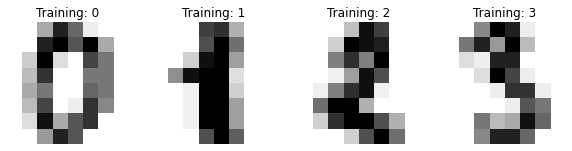

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))

for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

Для применения классификатора к загруженному набору данных, нам необходимо `развернуть` каждое изображение в вектор.

В результате набор данных будет иметь форму (N, $n_{features}$), где `N` - количество экземпляров в наборе данных, $n_{features}$ - количество значений в векторе признаков (соответствует количеству пикселей в изображении).

Затем нам необходимо разделить весь набор данных на две выборки - обучающую и тестовую.

**Вопрос**: Почему нам нужна тестовая выборка?

**Вопрос**: Почему мы не можем просто обучить модели и использовать ее дальше на реальных данных?

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

Инициализируем классификатор

In [ ]:
clf_svm = svm.LinearSVC()
clf_knn = neighbors.KNeighborsClassifier(n_neighbors=5)

Разделим исходный набор данных на текстовый и обучающий

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
print(n_samples, x_train.shape, x_test.shape)

1797 (898, 64) (899, 64)


Сбалансирован ли наш набор?

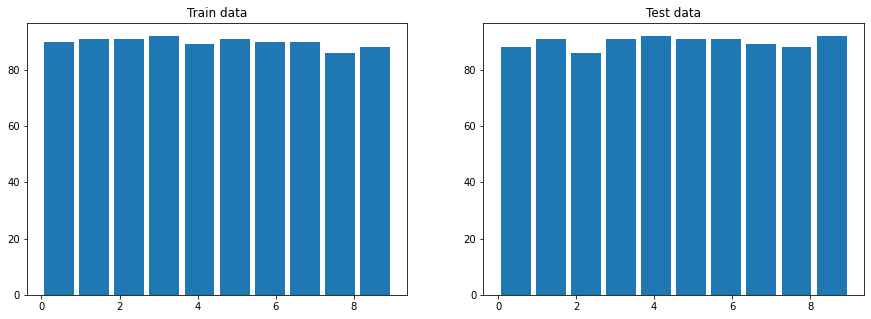

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Train data")
plt.hist(x=y_train, bins=10, rwidth=0.85)
plt.subplot(1, 2, 2)
plt.title("Test data")
plt.hist(x=y_test, bins=10, rwidth=0.85)
plt.show()

Обучим классификатор...

Да, это делается одной строчкой 🤯

In [ ]:
clf_svm.fit(x_train, y_train)
clf_knn.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


KNeighborsClassifier()

Как это работает внутри?

Мы минимизируем ошибку (отклонение предсказанных меток от истинных меток) по выбранному критерию.

Например, критерий по умолчанию для линейного `SVM` - это $L_2$ мера (Евклидово расстояние).

**Вопрос**: Как думаете, почему мы не присваиваем значение нашей обучалки?

А теперь проверим, что мы там наобучали

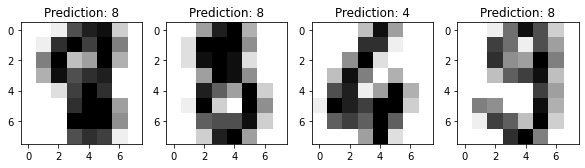

In [ ]:
predicted_svm = clf_svm.predict(x_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted_svm):
  ax.imshow(image.reshape((8, -1)), cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f"Prediction: {prediction}")

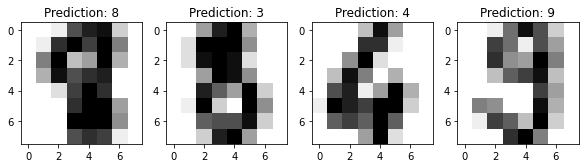

In [ ]:
predicted_knn = clf_knn.predict(x_test)

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, x_test, predicted_knn):
  ax.imshow(image.reshape((8, -1)), cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title(f"Prediction: {prediction}")

Качественная оценка результатов интересна (можно посмотреть глазами и это прикольно), но не очень информативна, поэтому предлагаю посмотреть количественные оценки, которые оценивают качество работы обученной нами модели.

Давайте обсудим, какие метрики чаще всего используют для оценки качества обученных моделей

##### **Accuracy**

В простейшем случае для оценки качества работы классификатора используют  метрику `accuracy`. Она представляет собой долю верно классифицированных объектов. У этой метрики есть одна интересная особенность, она присваивает всем классам один вес, что может дать "нечестный" результат в случае, когда ваша выборка сильно несбалансированна (например, картинок кошек у вас 1000, а собачек 100, ваш классификатор считает, что все картинки - кошки; метрика `accuracy` всё равно будет высокой, так как количество картинок с кошечками у вас намного больше).

$accuracy = \frac{P}{N}$

$P$ - количество верно классифицированных объектов

$N$ - количество всех объектов

Посмотрим на примере, классификатор определил 990 изображений с кошечками верно, с собачками лишь 5, однако, метрика `Accuracy` будет вычислена и равна:

$accuracy = \frac{990 + 5}{1000 + 100} = 90.45$



##### **Precision** и **Recall**

`Precision` (точность, но не путать с `accuracy`) - доля всех элементов выбранного класса действительно принаделжащих данному классу относительно всех элементов выбранного класса, которые ваш `ML`-алгоритм отнес к выбранному классу.

Пример: рассмотрим снова задачу классификации картинок на классы кошечки и собачки. Предположим, что мы считаем, как хорошо наш обученный алгоритм определяет кошечек. Метрика `precision` будет вычисляться как отношение количества картинок с кошечками, которые верно определил наш `ML`-алгоритм, к сумме количества картинок с кошечками, которые верно определил наш `ML`-алгоритм, и количества картинок с собачками, которые наш `ML`-алгоритм классифицировал как картинки с кошечками.

$Precision = \frac{TP}{TP + FP}$

$TP$ - истинно-положительное решение

$FP$ - ложно-положительное решение

Посмотрим на примере, классификатор определил 990 изображений с кошечками верно, с собачками лишь 5, метрика `Precision` для класса "собачки" будет вычислена и равна:

$Precision_{dogs} = \frac{5}{5 + 10} = 0.33$

Для класса "кошечки":

$Precision_{cats} = \frac{990}{990 + 95} = 0.91$

`Recall` (полнота) - доля верно классифицированных `ML`-алгоритмом элементов выбранного класса относительно всех элементов выбранного класса в выборке.

$Recall = \frac{TP}{TP + FN}$

$TP$ - истинно-положительное решение

$FN$ - ложно-отрицательное решение

Посмотрим на примере, классификатор определил 990 изображений с кошечками верно, с собачками лишь 5, метрика `Recall` для класса "собачки" будет вычислена и равна:

$Recall_{dogs} = \frac{5}{5 + 95} = 0.05$

Для класса "кошечки":

$Recall_{cats} = \frac{990}{990 + 10} = 0.99$

##### **F-мера**

Очевидно, что чем выше значения `Precision` и `Recall`, тем лучше для вас. Но как всегда практика всё портит... Да, на практике максимальное значение `Precision` и `Recall` недостижимо одновременно и нам необходимо искать некий баланс. Поэтому было бы классно иметь такую меру, которая объединяет в себе информацию о значениях `Precision` и `Recall`, для того чтобы делать осмвсленные выводы о пригодности на практике вашей модели. `F-мера` стремится к 0, если `Precision` или `Recall` стремится к 0. 

`F-мера` вычисляется следующим образом:

$F_1 = \frac{2*Precision * Recall}{Precision + Recall}$


Данная формула придает одинаковый вес для `Precision` и `Recall`, поэтому `F-мера` будет падать одинаково при уменьшении и `Precision` и `Recall`. Существует возможность рассчитать `F-меру`, придав различный вес для `Precision` и `Recall`, если вы осознанно отдаете приоритет одной из этих метрик при разработке алгоритма.

$F_{мера} = \frac{(b^2 + 1)*Precision * Recall}{b^2 * Precision + Recall}$

$0 < b < 1$, если вы хотите отдать приоритет `Precision`

$b > 1$, если вы хотите отдать приоритет `Recall`

$b = 1$, если вы хотите получить сбалансированную `F-меру` (как можно заметить, мы получаем $F_1$ меру)


Объединим результаты для `Precision` и `Recall` и рассчитаем `F-1` меру для класса "собачки":

$F_1 = \frac{2*Precision_{dogs} * Recall_{dogs}}{Precision_{dogs} + Recall_{dogs}} = \frac{2*0.33*0.05}{0.33 + 0.05} = 0.086$ 😢

**Вопрос**: Какой делаем вывод?

##### **Confusion Matrix** (матрица неточностей)

Матрица неточностей - это матрица размера `N`x`N`, где `N` - это количество классов. Когда мы классифицируем элемент из тестовой выборки, то мы инкрементируем число, стоящее на пересечении строки класса, которую вернул классификатор, и столбца, к которому действительно относится элемент класса. Таким образом, столбцы зарезервированы для истинных меток, а строки для решений классификатора. По такой матрице можно рассчитать все описанные ранее метрики.

Как? Подумайте сами 😉


---



Вернемся к практике

In [ ]:
print(f"{metrics.classification_report(y_test, predicted_svm)}")

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        88
           1       0.95      0.76      0.84        91
           2       0.95      0.98      0.97        86
           3       0.96      0.82      0.89        91
           4       0.99      0.93      0.96        92
           5       0.82      0.89      0.85        91
           6       0.96      0.99      0.97        91
           7       1.00      0.87      0.93        89
           8       0.69      0.92      0.79        88
           9       0.85      0.91      0.88        92

    accuracy                           0.90       899
   macro avg       0.91      0.90      0.90       899
weighted avg       0.91      0.90      0.90       899



In [ ]:
print(f"{metrics.classification_report(y_test, predicted_knn)}")

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899



Построим матрицу неточностей (Confusion matrix)

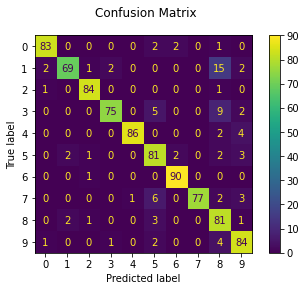

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_svm)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

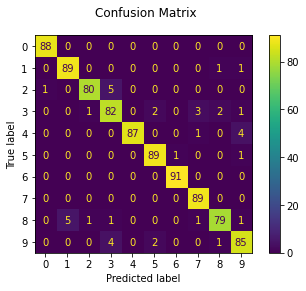

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted_knn)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

Вот мы обучили простейшую модель. Что нам с ней делать дальше? 

Каждый раз запускать скрипт и обучать модель - нерационально, поэтому после обучения мы с вами сохраним модель. Так, мы сможем ее использовать не только в рамках нашего скрипта, но и интегрировать, например, куда-то в более осмысленный проект (если модель, конечно, имеет ценность).

In [ ]:
import pickle

with open("clf_svm_model.pckl", "wb") as f:
  pickle.dump(clf_svm, f)

Теперь загрузим модель и проверим, что она по-прежнему работает

In [ ]:
with open("clf_svm_model.pckl", "rb") as f:
  clf_svm_loaded_model = pickle.load(f)

Итак, работает или нет...

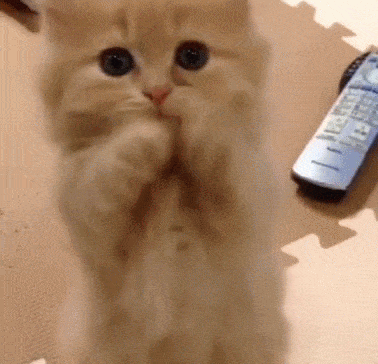

In [ ]:
predicted = clf_svm_loaded_model.predict(x_test)

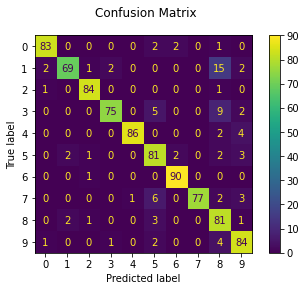

In [ ]:
disp_loaded_model = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp_loaded_model.figure_.suptitle("Confusion Matrix")
plt.show()

Итак, матрицы совпали!

Получается всё сделали правильно и всё работает!

**Вопрос**: Какие еще можно придумать задачи для классификации (из ваших лабораторных, кстати)?

Обращаю внимание, что классификацию можно проводить не только лишь по картинкам! Но и по числовым характеристикам! И даже по тексту (который на самом деле кодируется в цифры).

Классификаторы тоже бывают разные, их подробности вы рассмотрите на других курсах. В представленном примере мы рассмотрели `SVM`-классификатор и `k-NN`-классификатор. Но ими всё не ограничивается + у них также есть некоторое количество параметров, которые вы можете задавать, тем самым вы можете повлиять на качество их работы (как улучшить так и ухудшить). Для рассмотрения других классификаторов вы можете полистать документацию, в которой есть немало примеров.

### Задача регрессии 📈

Решая задачу регрессии, мы обучаем модель прогнозировать некоторое непрерывное значение, которое зависит от входных данных (признаков).

Простой пример: прогнозирование стоимости квартиры. В качестве признаков могут выступать такие характеристики, как площадь квартиры, удаленность от метро, "престижность" района, уровень преступности в районе и т.п.

Давайте решим задачу предсказания цен на дом

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

Загрузим набор данных о стоимости жилья в Калифорнии (стоимость жилья представлена в сотнях тысяч долларов США)

In [10]:
dataset = datasets.fetch_california_housing()
x, y = dataset.data, dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

In [11]:
x.shape, y.shape

((20640, 8), (20640,))

Как видно из представленных размеров данных, в наборе присутсвует информация о стоимости 20640 домов, стоимость дома оценивается на основе 8 признаков (среднее количество людей, проживающих в доме; среднее количество спален на дом и т.д. - подробнее можно почитать в документации).

In [12]:
regression_model = linear_model.LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

Как это работает внутри?

Мы минимизируем ошибку аппроксимации по выборанному критерию. 

При использовании линейной регрессии мы подбираем параметры линейной функции $y = ax + b$, в нашем случае параметры - это $a, b$. Обратите внимание, что размер $a$ будет зависеть от размера входного вектора, то есть, если входной вектор имеет 8 признаков, то $a$ будет иметь размер `1x8`.

При решении задачи линейной регрессии в качестве критерия, как правило, используют меру среднеквадратическое отклонение - `MSE`.

$MSE = \sqrt{\frac{1}{N}\sum\limits_{i=0}^{N-1}{(x_{true_i}-x_{predict_i})^2}}$



In [13]:
regression_model.coef_, regression_model.intercept_

(array([ 4.30764879e-01,  9.47653357e-03, -9.82051952e-02,  5.96616573e-01,
        -4.17126142e-07, -3.96097669e-03, -4.27466283e-01, -4.40126107e-01]),
 -37.37378583945813)

In [14]:
prediction = regression_model.predict(x_test)

Посмотрим результат...

Для оси `x` выберем первый признак - это средний доход. Можно выдвинуть гипотезу, что чем выше средний доход, тем выше стоимость жилья. Итак, проверим её...

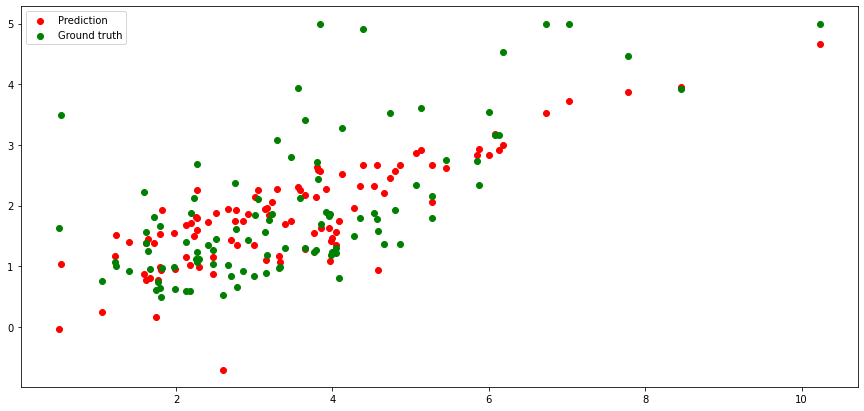

In [15]:
plt.figure(figsize=(15, 7))
plt.scatter(x_test[:100, 0], prediction[:100], c='r')
plt.scatter(x_test[:100, 0], y_test[:100], c='g')
plt.legend(('Prediction', 'Ground truth'))
plt.show()

Гипотеза подтвердилась! 😉

Давайте вспомним, что мы делали. Мы аппроксимировали функцию зависимости стоимости жилья от дохода, то есть мы получили уравнение $y = ax + b$, где $y$ - стоимость жилья, $x$ - доход. Параметры $a, b$ при обучении модели подбирались таким образом, чтобы минимизировать ошибку отклонения истинной стоимости дома от предсказанной стоимости.

Теперь оценим качество работы модели. Что можем сказать?

In [16]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, prediction)
print(mse)

0.505597832591715


Аналогично предыдущей задаче классификации, мы можем сохранить эту модель и использовать ее в дальнейшем.

Как и в случае с классификацией, задача регрессии решается не только с помощью алгоритма `LinearRegression`, подробнее о разных алгоритмах смотрите в документации! Также вы можете произвести настройку параметров вашего алгоритма, что позволит вам либо улучшить, либо ухудшить результат.

Обратите внимание еще на то, что, например, текущую модель мы, вероятно, не сможем использовать сейчас. Это связано с тем, что прошло какое-то время и данные устарели. Так что будьте внимательны при сборе данных! Не допускайте обучения модели на устаревших данных и внедрения этой же модели для работы с актуальными данными.

### Задача кластеризации

Решить задачу кластеризации значит произвести автоматическую группировку "похожих" (по каким-то признакам) объектов в кластеры (обучение без учителя).

Давайте перейдем от сложных абстракций к чему-то более "земному"...

В общем, рассматривать задачу кластеризации мы будем на сгенерированном наборе данных.

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

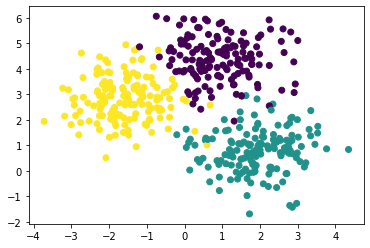

In [18]:
x, y = make_blobs(
   n_samples=450, n_features=2,
   centers=3, cluster_std=0.85,
   shuffle=True, random_state=0
)

plt.scatter(x[:, 0], x[:, 1], c=y, marker='o')
plt.show()

In [19]:
x.shape, y.shape

((450, 2), (450,))

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=0)

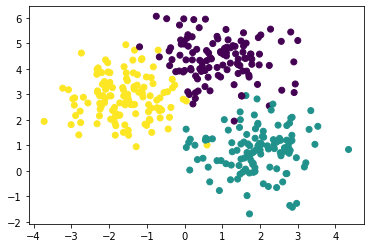

In [21]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, marker='o')
plt.show()

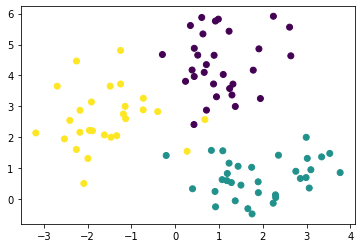

In [22]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, marker='o')
plt.show()

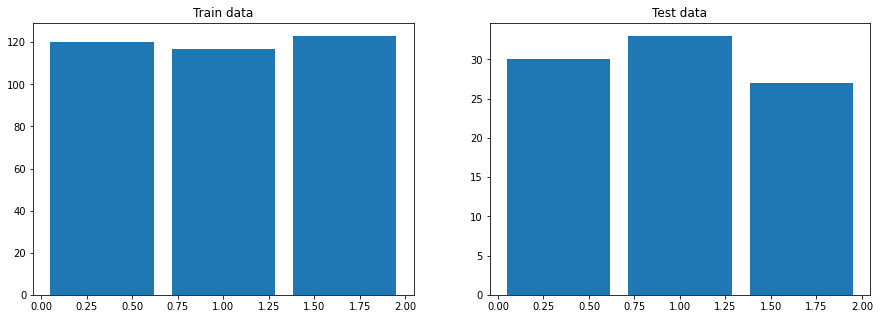

In [23]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Train data")
plt.hist(x=y_train, bins=3, rwidth=0.85)
plt.subplot(1, 2, 2)
plt.title("Test data")
plt.hist(x=y_test, bins=3, rwidth=0.85)
plt.show()

Для кластеризации мы будем использовать алгоритм `KMeans`. Он группирует данные, пытаясь разделить выборку на n кластеров с одинаковой (почти одинаковой) дисперсией, по критерию: $\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$, где $\mu_j$ - среднее значение кластера, центроид. Проще говоря, мы пытаемся минимизировать внутриклассовые ошибки. Данный алгоритм требует явного указания количества кластеров. 

Если вам интересно, то подробности работы алгоритма можно посмотреть в документации. Он там объясняется довольно подробно и без лишних дополнений.

In [24]:
model = KMeans(n_clusters=3)
model.fit(x_train)

train_predicted = model.predict(x_train)
test_predicted = model.predict(x_test)

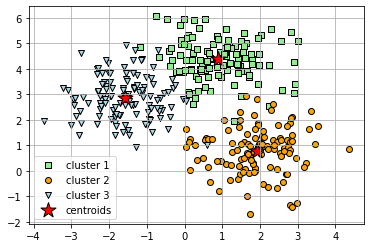

In [25]:
plt.scatter(
    x_train[y_train == 0, 0], x_train[y_train == 0, 1],
    c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x_train[y_train == 1, 0], x_train[y_train == 1, 1],
    c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x_train[y_train == 2, 0], x_train[y_train == 2, 1],
    c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

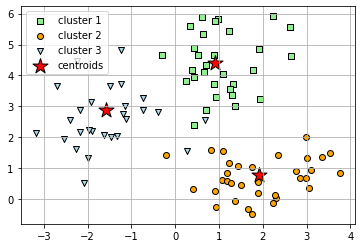

In [26]:
plt.scatter(
    x_test[y_test == 0, 0], x_test[y_test == 0, 1],
    c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x_test[y_test == 1, 0], x_test[y_test == 1, 1],
    c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x_test[y_test == 2, 0], x_test[y_test == 2, 1],
    c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    model.cluster_centers_[:, 0], model.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

Если вы заметили, то для обучения алгоритма кластеризации нам не нужно передавать метки элементов выборки (а при классификации - нужно). Это одна из отличительных особенностей методов "обучения без учителя".

Давайте оценим качество работы алгоритма

In [27]:
print(f"{metrics.classification_report(y_train, train_predicted)}")

NameError: ignored

In [ ]:
print(f"{metrics.classification_report(y_test, test_predicted)}")

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.97      0.97      0.97        33
           2       0.96      0.93      0.94        27

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



Небольшое заключение о кластеризации. 

Алгоритм для кластеризации не один, можно экспериментировать. 

Параметры в алгоритме можно менять. Их изменение может привести как к улучшению работы модели, так и к ухудшению.



## Сумбурное заключение

На текущей лекции вы познакомились с тем, как инициализировать различные модели, обучать, тестировать, сохранять, загружать и повторно использовать их. Это только начало! На практике, когда вы будете решать реальную задачу, то сначала вам нужно будет понять, какой характер имеют данные (признаки). Например, если вы решаете задачу регрессии, то данные могут быть распределены нелинейно, тогда вы сразу поймете, что использовать `LinearRegression` для прогнозирования - не самый лучший вариант. После того, как вы поймете, какая модель вам подходит, начнется самое интересное - эксперименты... Вы будете подбирать различные параметры модели и смотреть, какая комбинация даст вам лучший результат. 


Ошибиться в подготовке данных - значит выстрелить себе в ногу и умножить на 0 всю последующую работу. Будьте внимательны с тем, в каком формате подаете данные для обучения модели и для тестирования. Если характер данных различен (например, данные в тестовой выборке смещены), то результат работы вас расстроит. Лучше всего привести данные к какой-то стандартной форме - например, нормировать их. А еще всегда проверяйте ваши данные на сбалансированность, чтобы потом собачки не стали котиками 😁.